
# NaviGator Toolkit Image Generataion

This notebook is designed to test connection to the NaviGator Toolkit API ([see here for more information](https://it.ufl.edu/ai/navigator-toolkit/)). You will need a NaviGator API key. The key should be stored in a `.json` file with the following format:

    {
      "OPENAI_API_KEY" : "Put your key here in the quotes",
      "base_url" : "https://api.ai.it.ufl.edu/"
    }

We suggest putting that in your home directory, to minimize the chances of accidentally adding and committing the file to a git repo. Remember that anyone with your API key can use NaviGator as you! 

In [1]:
import openai
import os
import json

# These are needed to decode the returned image data
import base64
from IPython.display import Image, display

## Load `.json` file with your key and api endpoint URL

In [2]:
# Set the path to your jsnkey file
key_file = '/home/magitz/navigator_api_keys.json'


# Load the JSON file
with open(key_file, 'r') as file:
    data = json.load(file)

# Extract the values
OPENAI_API_KEY = data.get('OPENAI_API_KEY')
base_url = data.get('base_url')

# Set the environment variable
os.environ['TOOLKIT_API_KEY'] = OPENAI_API_KEY


## Test connectivity and get model list

Reply should list the models that are available with your API key. An example, truncated, output is:

    SyncPage[Model](data=[Model(id='llama-3.1-70b-instruct', created=1677610602, object='model', owned_by='openai'), Model(id='sfr-embedding-mistral', created=1677610602, object='model', owned_by='openai'),...)], object='list')

In [3]:
# Check list of available models
client = openai.OpenAI(
    api_key=os.environ.get("TOOLKIT_API_KEY"),
    base_url=base_url
)

response = client.models.list()
 
print(response)

SyncPage[Model](data=[Model(id='nomic-embed-text-v1.5', created=1677610602, object='model', owned_by='openai'), Model(id='gte-large-en-v1.5', created=1677610602, object='model', owned_by='openai'), Model(id='llama-3.3-70b-instruct', created=1677610602, object='model', owned_by='openai'), Model(id='flux.1-schnell', created=1677610602, object='model', owned_by='openai'), Model(id='flux.1-dev', created=1677610602, object='model', owned_by='openai'), Model(id='mistral-7b-instruct', created=1677610602, object='model', owned_by='openai'), Model(id='nim-mistral-7b-instruct', created=1677610602, object='model', owned_by='openai'), Model(id='codestral-22b', created=1677610602, object='model', owned_by='openai'), Model(id='sfr-embedding-mistral', created=1677610602, object='model', owned_by='openai'), Model(id='llama-3.1-8b-instruct', created=1677610602, object='model', owned_by='openai'), Model(id='granite-3.1-8b-instruct', created=1677610602, object='model', owned_by='openai'), Model(id='llama

In [4]:
# Print available models in better format
for model in response:
    print(model.id)

nomic-embed-text-v1.5
gte-large-en-v1.5
llama-3.3-70b-instruct
flux.1-schnell
flux.1-dev
mistral-7b-instruct
nim-mistral-7b-instruct
codestral-22b
sfr-embedding-mistral
llama-3.1-8b-instruct
granite-3.1-8b-instruct
llama-3.1-70b-instruct
nim-llama-3.1-8b-instruct
whisper-large-v3
mixtral-8x7b-instruct


## Test model completion

You may need to update the model from the list above as the available models change over time.

Here is the start of an example response:

    ImagesResponse(created=1741702623449, data=[Image(b64_json=None, revised_prompt=None, url='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB...

The image itself is encoded in the `url` part of the response.

In [5]:
# Set model from list above
model="flux.1-schnell"

response = client.images.generate(
  model=model,
  prompt="An Alligator walking around the University of Florida saying hi to students.",
  size="1024x1024",
  quality="standard",
  n=1,
  response_format="url"
)

# The returned image is encoded in the "url" part of the response
image_url = response.data[0].url

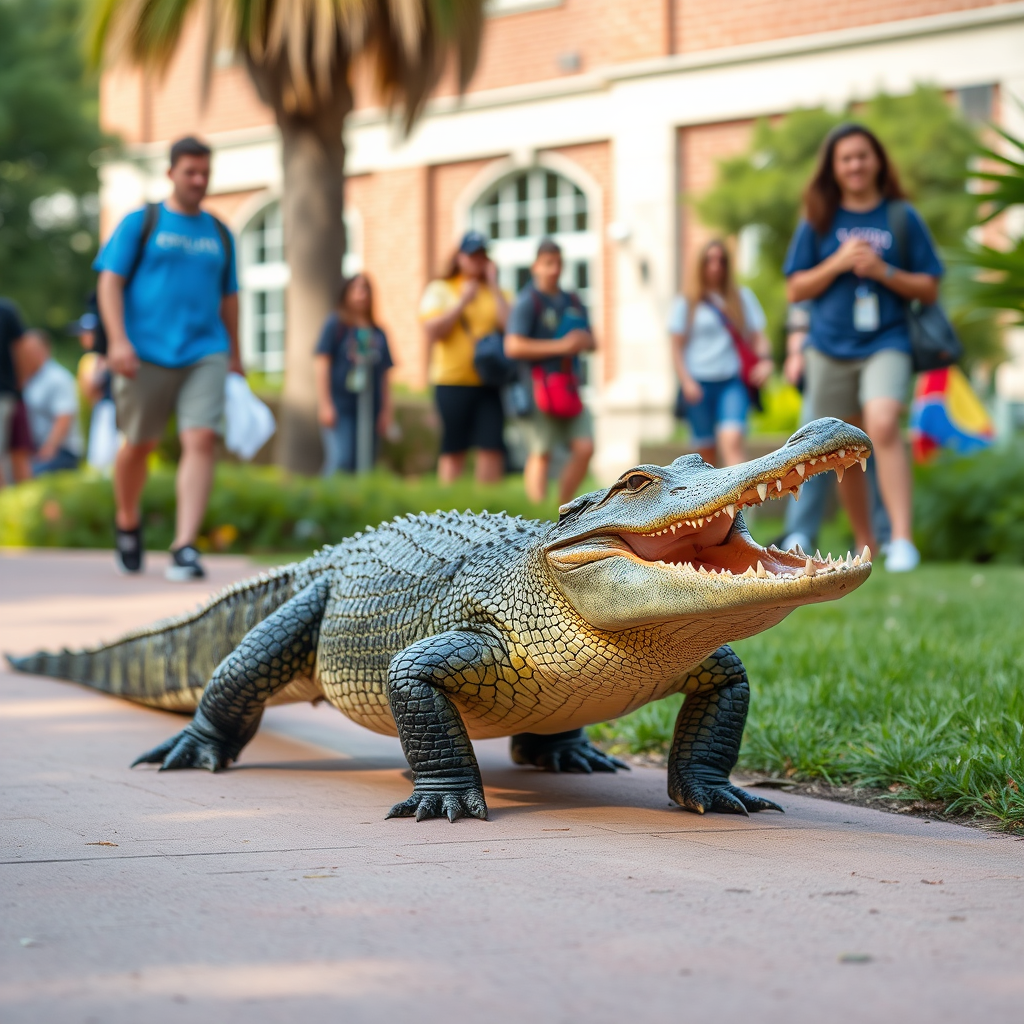

In [6]:
# Display the image by getting the encoded image_data and diplaying it.

# Decode the Base64 string
image_data = base64.b64decode(image_url.split(',')[1])

# Display the image
display(Image(data=image_data))